<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#import" data-toc-modified-id="import-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>import</a></span></li></ul></li><li><span><a href="#读取数据集" data-toc-modified-id="读取数据集-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>读取数据集</a></span></li><li><span><a href="#标准化处理" data-toc-modified-id="标准化处理-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>标准化处理</a></span></li><li><span><a href="#模型" data-toc-modified-id="模型-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>模型</a></span><ul class="toc-item"><li><span><a href="#根据task5获取3个最优模型" data-toc-modified-id="根据task5获取3个最优模型-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>根据task5获取3个最优模型</a></span></li><li><span><a href="#投票分类器" data-toc-modified-id="投票分类器-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>投票分类器</a></span><ul class="toc-item"><li><span><a href="#hard" data-toc-modified-id="hard-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>hard</a></span></li><li><span><a href="#soft" data-toc-modified-id="soft-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>soft</a></span></li></ul></li></ul></li><li><span><a href="#堆叠法-stacking" data-toc-modified-id="堆叠法-stacking-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>堆叠法 stacking</a></span></li><li><span><a href="#评分--混淆矩阵-&amp;-precision_score-&amp;-recall_score" data-toc-modified-id="评分--混淆矩阵-&amp;-precision_score-&amp;-recall_score-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>评分- 混淆矩阵 &amp; precision_score &amp; recall_score</a></span></li><li><span><a href="#评分表格" data-toc-modified-id="评分表格-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>评分表格</a></span></li><li><span><a href="#结果汇总" data-toc-modified-id="结果汇总-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>结果汇总</a></span><ul class="toc-item"><li><span><a href="#计算评分" data-toc-modified-id="计算评分-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>计算评分</a></span></li><li><span><a href="#输出" data-toc-modified-id="输出-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>输出</a></span></li></ul></li><li><span><a href="#目前最优模型" data-toc-modified-id="目前最优模型-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>目前最优模型</a></span></li></ul></div>

模型融合方式任意，并结合Task5给出你的最优结果。
时间：2天

例如Stacking融合，用你目前评分最高的模型作为基准模型，和其他模型进行stacking融合，得到最终模型及评分结果。

## import

In [1]:
import json, io, re, os, time
from datetime import datetime, timedelta
from pandas.io.json import json_normalize
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn

from collections import defaultdict, Counter
%matplotlib inline

In [3]:
# 设置显示行数
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [5]:
import numpy as np
import pandas as pd
# import pandas_profiling

# df.profile_report(style={'full_width':True})

# 读取数据集

经过前续处理缺失值后和特征选择后

In [6]:
# train_set.profile_report(style={'full_width':True})

# consfin_avg_limit has 103 (3.1%) zeros	Zeros
# consfin_credit_limit is highly correlated with consfin_avg_limit (ρ = 0.9054651558)	Rejected
# consfin_max_limit has 103 (3.1%) zeros	Zeros
# consume_mini_time_last_1_month has 1457 (43.8%) zeros	Zeros
# consume_top_time_last_1_month has 712 (21.4%) zeros	Zeros
# first_transaction_time_diff_day is highly correlated with first_transaction_day (ρ = 1)	Rejected
# history_fail_fee has 202 (6.1%) zeros	Zeros
# latest_one_month_fail has 2277 (68.5%) zeros	Zeros
# latest_one_month_suc has 1810 (54.4%) zeros	Zeros
# latest_query_day has 36 (1.1%) zeros	Zeros
# latest_query_time_diff_day is highly correlated with latest_query_day (ρ = 0.9999831434)	Rejected
# latest_six_month_loan has 52 (1.6%) zeros	Zeros
# loans_avg_limit has 65 (2.0%) zeros	Zeros
# loans_count is highly correlated with history_suc_fee (ρ = 0.9140065658)	Rejected
# loans_credit_limit has 65 (2.0%) zeros	Zeros
# loans_latest_time_diff_day is highly correlated with loans_latest_day (ρ = 0.9999793714)	Rejected
# loans_max_limit has 65 (2.0%) zeros	Zeros
# loans_overdue_count has 1098 (33.0%) zeros	Zeros
# loans_score is highly correlated with apply_score (ρ = 0.9654417553)	Rejected
# loans_settle_count is highly correlated with loans_count (ρ = 0.9762643316)	Rejected
# max_cumulative_consume_later_1_month is highly skewed (γ1 = 26.38045116)	Skewed
# max_cumulative_consume_later_1_month has 346 (10.4%) zeros	Zeros
# pawns_auctions_trusts_consume_last_1_month has 1617 (48.6%) zeros	Zeros
# pawns_auctions_trusts_consume_last_6_month has 295 (8.9%) zeros	Zeros
# repayment_capability is highly skewed (γ1 = 26.90108787)	Skewed
# take_amount_in_later_12_month_highest has 1092 (32.8%) zeros	Zeros
# trans_amount_3_month is highly skewed (γ1 = 42.33606162)	Skewed
# trans_amount_3_month has 66 (2.0%) zeros	Zeros
# trans_amount_increase_rate_lately is highly skewed (γ1 = 56.87152308)	Skewed
# trans_fail_top_count_enum_last_1_month has 966 (29.0%) zeros	Zeros
# trans_fail_top_count_enum_last_6_month has 69 (2.1%) zeros	Zeros
# trans_top_time_last_1_month is highly correlated with consume_top_time_last_1_month (ρ = 0.9222042013)	Rejected
# trans_top_time_last_6_month is highly correlated with consume_top_time_last_6_month (ρ = 0.926644283)	Rejected


In [7]:
cols_left = ['trans_activity_month', 'trans_activity_day', 'rank_trad_1_month', 
             'top_trans_count_last_1_month', 'avg_price_top_last_12_valid_month', 
             'first_transaction_time_diff_day', 'latest_query_time_diff_day', 
             'loans_latest_time_diff_day', 'take_amount_in_later_12_month_highest', 
             'trans_amount_increase_rate_lately', 'transd_mcc', 'trans_days_interval_filter',
             'trans_days_interval', 'repayment_capability', 'number_of_trans_from_2011', 
             'historical_trans_amount', 'historical_trans_day', 'trans_amount_3_month', 
             'abs', 'avg_price_last_12_month', 'trans_top_time_last_1_month', 'trans_top_time_last_6_month', 
             'consume_top_time_last_1_month', 'consume_top_time_last_6_month', 
             'trans_fail_top_count_enum_last_1_month', 'trans_fail_top_count_enum_last_6_month',
             'trans_fail_top_count_enum_last_12_month', 'consume_mini_time_last_1_month', 
             'max_cumulative_consume_later_1_month', 'pawns_auctions_trusts_consume_last_1_month', 
             'pawns_auctions_trusts_consume_last_6_month', 'first_transaction_day', 'trans_day_last_12_month',
             'apply_score', 'apply_credibility', 'query_sum_count', 'loans_score', 'loans_count', 
             'loans_settle_count', 'loans_overdue_count', 'latest_six_month_loan', 'history_suc_fee', 
             'history_fail_fee', 'latest_one_month_suc', 'latest_one_month_fail', 'loans_long_time', 
             'loans_credit_limit', 'loans_max_limit', 'loans_avg_limit', 'consfin_credit_limit', 
             'consfin_max_limit',
             'consfin_avg_limit', 'latest_query_day', 'loans_latest_day',
            'status']

In [8]:
for col in ['consfin_credit_limit',
 'first_transaction_time_diff_day',
 'latest_query_time_diff_day',
 'loans_count',
 'loans_latest_time_diff_day',
 'loans_score',
 'loans_settle_count',
 'trans_top_time_last_1_month',
 'trans_top_time_last_6_month']:
    cols_left.remove(col)

In [9]:
len(cols_left)

46

In [10]:
train_set = pd.read_csv('train_set.csv', usecols = cols_left )
test_set = pd.read_csv('test_set.csv', usecols = cols_left)

In [11]:
# profile = x_train.profile_report()
# rejected_variables = profile.get_rejected_variables(threshold=0.9)

In [12]:
train_set.head()

,trans_activity_month,trans_activity_day,rank_trad_1_month,top_trans_count_last_1_month,avg_price_top_last_12_valid_month,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,transd_mcc,trans_days_interval_filter,trans_days_interval,repayment_capability,number_of_trans_from_2011,historical_trans_amount,historical_trans_day,trans_amount_3_month,abs,avg_price_last_12_month,consume_top_time_last_1_month,consume_top_time_last_6_month,trans_fail_top_count_enum_last_1_month,trans_fail_top_count_enum_last_6_month,trans_fail_top_count_enum_last_12_month,consume_mini_time_last_1_month,max_cumulative_consume_later_1_month,pawns_auctions_trusts_consume_last_1_month,pawns_auctions_trusts_consume_last_6_month,first_transaction_day,trans_day_last_12_month,apply_score,apply_credibility,query_sum_count,loans_overdue_count,latest_six_month_loan,history_suc_fee,history_fail_fee,latest_one_month_suc,latest_one_month_fail,loans_long_time,loans_credit_limit,loans_max_limit,loans_avg_limit,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day,status
0,0.83,0.136,1.00,1.00,0.45,300,0.99,13.0,127.0,95.0,10480,10.0,33830,41.0,4260,830,1300,0.0,15.0,3.0,4.0,4.0,0.0,0,0,6160,434.0,93.0,530.0,78.0,12.0,2.0,3.0,16.0,10.0,0.0,0.0,302.0,2400.0,2800.0,2400.0,0.0,0.0,12.0,164.0,0
1,1.00,0.438,0.30,0.10,0.55,1500,0.72,14.0,6.0,6.0,15790,6.0,100060,79.0,28580,10550,1040,9.0,9.0,2.0,3.0,3.0,267070.0,2800,0,4350,238.0,82.0,545.0,79.0,22.0,2.0,27.0,62.0,19.0,4.0,0.0,351.0,2100.0,4000.0,1992.0,18000.0,7600.0,2.0,2.0,0
2,0.83,0.486,0.25,0.05,0.50,500,0.98,22.0,23.0,15.0,14050,70.0,302720,359.0,63600,650,1140,10.0,15.0,2.0,10.0,10.0,852.0,2390,1160,52310,2631.0,82.0,524.0,80.0,24.0,9.0,14.0,64.0,42.0,1.0,0.0,354.0,2100.0,3700.0,1725.0,12000.0,8614.0,6.0,67.0,0
3,0.68,0.555,0.20,0.05,0.50,0,0.82,18.0,7.0,7.0,11880,26.0,367680,267.0,64150,6260,1090,7.0,7.0,2.0,2.0,5.0,501194.0,2030,1230,43930,1229.0,82.0,540.0,78.0,7.0,1.0,6.0,47.0,3.0,0.0,0.0,348.0,1600.0,2300.0,1362.0,13200.0,8800.0,25.0,110.0,0
4,0.88,0.136,1.00,1.00,0.60,500,4.24,15.0,81.0,36.0,11010,21.0,30610,71.0,3000,550,570,0.0,22.0,8.0,8.0,8.0,0.0,0,0,8270,871.0,141.0,533.0,79.0,8.0,5.0,6.0,5.0,130.0,0.0,12.0,318.0,1200.0,1200.0,1200.0,2400.0,1466.0,23.0,91.0,1


In [13]:
train_set.shape

(3326, 46)

In [14]:
test_set.shape

(1426, 46)

In [15]:
# 逻辑回归
# svm
# 决策树
# 随机森林
# XGBoost

In [16]:
cols_0_to_1 =  ['low_volume_percent',
 'middle_volume_percent',
 'trans_activity_month',
 'trans_activity_day',
 'rank_trad_1_month',
 'top_trans_count_last_1_month',
 'avg_price_top_last_12_valid_month']

In [17]:
cols_catg = ['regional_mobility',
 'student_feature',
 'is_high_user',
 'reg_preference_for_trad']

In [18]:
train_set.columns

Index(['trans_activity_month', 'trans_activity_day', 'rank_trad_1_month',
       'top_trans_count_last_1_month', 'avg_price_top_last_12_valid_month',
       'take_amount_in_later_12_month_highest',
       'trans_amount_increase_rate_lately', 'transd_mcc',
       'trans_days_interval_filter', 'trans_days_interval',
       'repayment_capability', 'number_of_trans_from_2011',
       'historical_trans_amount', 'historical_trans_day',
       'trans_amount_3_month', 'abs', 'avg_price_last_12_month',
       'consume_top_time_last_1_month', 'consume_top_time_last_6_month',
       'trans_fail_top_count_enum_last_1_month',
       'trans_fail_top_count_enum_last_6_month',
       'trans_fail_top_count_enum_last_12_month',
       'consume_mini_time_last_1_month',
       'max_cumulative_consume_later_1_month',
       'pawns_auctions_trusts_consume_last_1_month',
       'pawns_auctions_trusts_consume_last_6_month', 'first_transaction_day',
       'trans_day_last_12_month', 'apply_score', 'apply_credi

# 标准化处理

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
x_train, y_train = train_set.iloc[:, :-1], train_set['status']
x_test, y_test = test_set.iloc[:, :-1], test_set['status']

In [21]:
features = x_train.columns

In [22]:
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)

In [23]:
x_test_scale = scaler.transform(x_test)

In [24]:
x_train = pd.DataFrame(x_train_scale, columns=x_train.columns)
x_test = pd.DataFrame(x_test_scale, columns=x_test.columns)

In [25]:
x_train.head()

,trans_activity_month,trans_activity_day,rank_trad_1_month,top_trans_count_last_1_month,avg_price_top_last_12_valid_month,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,transd_mcc,trans_days_interval_filter,trans_days_interval,repayment_capability,number_of_trans_from_2011,historical_trans_amount,historical_trans_day,trans_amount_3_month,abs,avg_price_last_12_month,consume_top_time_last_1_month,consume_top_time_last_6_month,trans_fail_top_count_enum_last_1_month,trans_fail_top_count_enum_last_6_month,trans_fail_top_count_enum_last_12_month,consume_mini_time_last_1_month,max_cumulative_consume_later_1_month,pawns_auctions_trusts_consume_last_1_month,pawns_auctions_trusts_consume_last_6_month,first_transaction_day,trans_day_last_12_month,apply_score,apply_credibility,query_sum_count,loans_overdue_count,latest_six_month_loan,history_suc_fee,history_fail_fee,latest_one_month_suc,latest_one_month_fail,loans_long_time,loans_credit_limit,loans_max_limit,loans_avg_limit,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,0.134047,-1.353319,1.992037,1.839581,-0.107077,-0.403875,-0.021182,-1.004892,2.613071,4.484165,-0.145876,-1.290611,-0.586927,-1.358984,-0.311294,-0.297651,0.082433,-1.300570,-0.423735,0.696823,-0.122621,-0.258803,-0.414413,-0.313775,-0.192204,-0.442215,-1.120560,0.234496,-0.894778,0.489077,-0.438137,-0.075726,-1.017990,-0.903410,-0.294631,-0.598487,-0.320305,-1.002166,0.453138,-0.401657,1.055294,-1.112937,-1.409680,0.219396,0.668269
1,0.990363,0.416102,-0.659154,-0.721391,0.289513,-0.113359,-0.021508,-0.781014,-0.574439,-0.947529,-0.057434,-1.684796,-0.393775,-0.978945,-0.100813,0.032556,-0.276177,0.373749,-0.874773,0.174245,-0.335037,-0.459263,0.310349,-0.010055,-0.192204,-0.504100,-1.482824,-0.382186,-0.595405,0.739142,0.467321,-0.075726,1.235352,0.641945,0.081820,1.489156,-0.320305,0.430439,0.015780,0.438275,0.320450,0.123866,-0.067564,0.180959,0.060388
2,0.134047,0.697335,-0.848524,-0.863667,0.091218,-0.355456,-0.021194,1.010008,-0.126607,-0.398256,-0.086415,4.622159,0.197260,1.821340,0.202273,-0.303766,-0.138250,0.559784,-0.423735,0.174245,1.151875,0.943961,-0.412100,-0.054528,-0.031308,1.135691,2.940132,-0.382186,-1.014528,0.989206,0.648413,2.196239,0.014792,0.709135,1.043861,-0.076576,-0.320305,0.518150,0.015780,0.228292,-0.160440,-0.288401,0.111503,0.196334,0.304291
3,-0.621527,1.101607,-1.037895,-0.863667,0.091218,-0.476505,-0.021387,0.114497,-0.548095,-0.886499,-0.122558,0.286128,0.386708,0.901247,0.207033,-0.113183,-0.207214,0.001678,-1.025119,0.174245,-0.547453,-0.058342,0.945703,-0.093578,-0.021598,0.849172,0.348830,-0.382186,-0.695196,0.489077,-0.890866,-0.400292,-0.736322,0.138025,-0.587426,-0.598487,-0.320305,0.342729,-0.713151,-0.751629,-0.814235,-0.205948,0.144349,0.269363,0.465642
4,0.385904,-1.353319,1.992037,1.839581,0.487808,-0.355456,-0.017263,-0.557137,1.401290,0.883379,-0.137048,-0.206603,-0.596318,-1.058954,-0.322199,-0.307163,-0.924434,-1.300570,0.102476,3.309715,0.727043,0.543040,-0.414413,-0.313775,-0.192204,-0.370072,-0.312857,2.925474,-0.834904,0.739142,-0.800321,0.897974,-0.736322,-1.272952,4.724713,-0.598487,2.832350,-0.534377,-1.296296,-1.521568,-1.106012,-0.948030,-1.150793,0.261676,0.394348


In [26]:
# x_train.profile_report(style={'full_width':True})

# Dataset info

# Number of variables	45
# Number of observations	3326
# Missing cells	0 (0.0%)
# Duplicate rows	0 (0.0%)
# Total size in memory	1.1 MiB
# Average record size in memory	360.0 B
# Variables types

# Numeric	45
# Categorical	0
# Boolean	0
# Date	0
# URL	0
# Text (Unique)	0
# Rejected	0
# Unsupported	0Warnings
# max_cumulative_consume_later_1_month is highly skewed (γ1 = 26.38045116)	Skewed
# repayment_capability is highly skewed (γ1 = 26.90108787)	Skewed
# trans_amount_3_month is highly skewed (γ1 = 42.33606162)	Skewed
# trans_amount_increase_rate_lately is highly skewed (γ1 = 56.87152308)	Skewed

In [27]:
# profile = x_train.profile_report()
# rejected_variables = profile.get_rejected_variables(threshold=0.9)

In [28]:
x_train_scale

array([[ 0.13404651, -1.35331866,  1.99203681, ..., -1.40968007,
         0.21939562,  0.66826917],
       [ 0.99036309,  0.41610248, -0.65915369, ..., -0.06756396,
         0.18095929,  0.06038847],
       [ 0.13404651,  0.69733498, -0.84852444, ...,  0.11150258,
         0.19633382,  0.30429122],
       ...,
       [ 0.73850528,  0.41610248, -0.84852444, ...,  0.74123759,
         0.16558476,  0.26676772],
       [ 0.48664746, -0.82014872, -0.28041219, ..., -0.16469079,
        -3.66651702, -3.69571392],
       [-0.16818287,  1.26565899, -1.60600744, ...,  0.81540716,
         0.22708288,  0.16545427]])

In [29]:
x_test_scale

array([[ 0.99036309, -0.07019538, -0.09104144, ..., -0.70595209,
         0.18480292,  0.11667372],
       [ 0.33553277,  1.34768513, -0.09104144, ..., -0.36777414,
         0.38082819,  0.25551067],
       [-0.52078381,  1.98045826, -1.03789519, ..., -0.2070734 ,
         0.17711566,  0.08290257],
       ...,
       [-1.47784352, -0.42759502,  0.09832931, ...,  0.25913535,
         0.19633382,  0.25926302],
       [-0.36966912,  1.1016067 , -0.65915369, ..., -0.27629834,
         0.25014468,  0.24425362],
       [ 0.99036309,  0.53328269, -0.46978294, ...,  0.24324187,
         0.18864656,  0.06038847]])

In [30]:
# x_train, x_test = x_train_scale, x_test_scale

# 模型

    逻辑回归
    svm
    决策树
    随机森林
    XGBoost

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Grid search cross validation
from sklearn.model_selection import GridSearchCV

## 根据task5获取3个最优模型

选用 ['XGBoost', '逻辑回归', '随机森林']

In [32]:
# {'C': 0.05, 'penalty': 'l1', 'solver': 'liblinear'}
clf_lr = LogisticRegression(C=0.05, penalty='l2', solver= 'liblinear', n_jobs=-1)

In [66]:
#  for k, v in {'bootstrap': False, 
#     'max_depth': 90, 
#     'max_features': 3,
#     'min_samples_leaf': 5, 
#     'min_samples_split': 8, 
#     'n_estimators': 300}.items():
#         print(f'{k} = {v},', end=' ')
clf_rf = RandomForestClassifier(bootstrap = False, max_depth = 90, 
                                max_features = 3, min_samples_leaf = 5, 
                                min_samples_split = 8, n_estimators = 300, n_jobs=-1)

In [67]:
clf_xgb = xgb.XGBClassifier(
        max_depth=5,
        learning_rate=0.01,
        n_estimators=500,              
        silent=True,
        objective='binary:logistic',
        nthread=-1,
        gamma=0,
        min_child_weight=10,
        max_delta_step=0,
        subsample=0.85,
        colsample_bytree=0.7,
        colsample_bylevel=1,
        reg_alpha=0,
        reg_lambda=1,
        scale_pos_weight=1,
        seed=1440,
        missing=None)

## 投票分类器

In [68]:
from sklearn.ensemble import VotingClassifier

### hard

In [69]:
clf_vote = VotingClassifier(
    estimators=[('lr', clf_lr), ('rf', clf_rf), ('xgb', clf_xgb)], 
    voting='hard'
)

In [70]:
clf_vote.fit(x_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=False,
                                                     class_weight=None,
                                                     criterion='gini'...
                                        

In [71]:
from sklearn.metrics import accuracy_score
for clf in (clf_lr, clf_rf, clf_xgb, clf_vote):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression 0.8022440392706872
RandomForestClassifier 0.7973352033660589
XGBClassifier 0.8050490883590463


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier 0.8050490883590463


In [52]:
# 投票方便的准确率稍微提高一些

### soft

In [79]:
# 基于概率
clf_vote_s = VotingClassifier(
    estimators=[('lr', clf_lr), ('rf', clf_rf), ('xgb', clf_xgb)], 
    voting='soft'
)

In [80]:
clf_vote_s.fit(x_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=False,
                                                     class_weight=None,
                                                     criterion='gini'...
                                        

In [81]:
clf_vote_s.score(x_train, y_train)

0.8656043295249549

In [82]:
clf_vote_s.score(x_test, y_test)

0.8022440392706872

In [83]:
from sklearn.metrics import accuracy_score
for clf in (clf_lr, clf_rf, clf_xgb, clf_vote, clf_vote_s):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression 0.8022440392706872
RandomForestClassifier 0.800140252454418
XGBClassifier 0.8050490883590463


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier 0.8057503506311361


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier 0.8015427769985974


# 堆叠法 stacking

例如Stacking融合，用你目前评分最高的模型作为基准模型，和其他模型进行stacking融合，得到最终模型及评分结果。

In [111]:
from sklearn.model_selection import StratifiedKFold

In [113]:
# https://zhuanlan.zhihu.com/p/61705517

In [125]:
# !pip install mlxtend

In [117]:
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection

In [ ]:
# (clf_lr, clf_rf, clf_xgb, clf_vote, clf_vote_s)

In [116]:
clf_stack = StackingClassifier(classifiers=[clf_lr, clf_rf, clf_xgb], 
                          meta_classifier=clf_lr)

In [118]:
for clf, label in zip([clf_lr, clf_rf, clf_xgb, clf_stack], 
                      ['lr', 
                       'Random Forest', 
                       'xgb',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, x_train, y_train, 
                                              cv=5, scoring='roc_auc')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Accuracy: 0.78 (+/- 0.02) [lr]
Accuracy: 0.78 (+/- 0.02) [Random Forest]
Accuracy: 0.79 (+/- 0.02) [xgb]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Accuracy: 0.65 (+/- 0.02) [StackingClassifier]


In [112]:
# clfs = [clf_lr, clf_rf, clf_xgb, clf_stack]

In [128]:
clf_stack.predict??

In [130]:
clf_stack.fit(x_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


StackingClassifier(average_probas=False,
                   classifiers=[LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='warn',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=None,
                                                   solver='warn', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False),
                                RandomForestClassifier(bootstrap=False,
                                                       class_weight=None,
                     

In [131]:
clf_stack.score(x_train, y_train)

0.9795550210463019

In [132]:
clf_stack.score(x_test, y_test)

0.7987377279102384

# 评分- 混淆矩阵 & precision_score & recall_score

In [119]:
# 混淆矩阵
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [120]:
# confusion_matrix??
#     >>> tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
#     >>> (tn, fp, fn, tp)
#     (0, 2, 1, 1)

In [121]:
def get_P_R_value(y_test, y_test_pred):
    obj = confusion_matrix(y_test, y_test_pred)
    print('confusion_matrix\n', obj)
    score = (obj[0,0] + obj[1,1])/obj.sum()
    print(f'score, {score:0.4f}')
    P = precision_score(y_test, y_test_pred)
    R = recall_score(y_test, y_test_pred)
    F1 = f1_score(y_test, y_test_pred)
    print(f'precision {P:0.4f}, recall {R:0.4f}, f1_score {F1:0.4f}')

# 评分表格

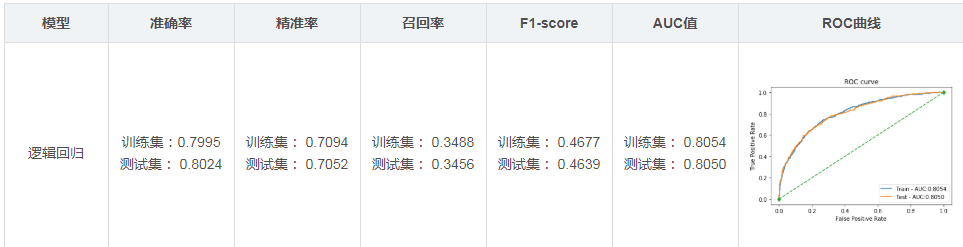

In [122]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

def get_P_R_value(y_true, y_pred):
    """
    :param y_true: 
    :param y_pred: 
    :returns: 
        # ['准确率_score', '精准率_precision', '召回率_recall', 'f1_score'],
        # [score, P, R, F1]
    :raises keyError: raises an exception
    """
    obj = confusion_matrix(y_true, y_pred)
    print('confusion_matrix\n', obj)
    score = (obj[0,0] + obj[1,1])/obj.sum()
    print(f'score, {score:0.4f}')
    P = precision_score(y_true, y_pred)
    R = recall_score(y_true, y_pred)
    F1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    print(f'precision {P:0.4f}, recall {R:0.4f}, f1_score {F1:0.4f}, auc {auc:0.4f}')
    data = dict(zip(
        ['score', 'precision', 'recall', 'f1_score', 'auc'],
        [f'{score:0.4f}',f'{P:0.4f}', f'{R:0.4f}', f'{F1:0.4f}', f'{auc:0.4f}']
    ))
    return data

ROC曲线

In [99]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

In [100]:
clf_model = 'clf_lr'
data_set = 'train'
def get_roc_element(clf_model,data_set):

    clf = eval(clf_model)
    y_true = eval('y_%s' % data_set)
    x = eval('x_%s' % data_set)
    
    if clf_model in ['clf_dt', 'clf_rf']:
        y_probas = cross_val_predict(clf, x, y_true, cv=3, method='predict_proba')
        y_scores = y_probas[:, 1]
    else:
        y_scores = cross_val_predict(clf, x, y_true, cv=3, method='decision_function')
        
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_data = dict(zip(
        ['clf_model', 'data_set', 'fpr', 'tpr', 'thresholds'],
        [clf_model, data_set, fpr, tpr, thresholds]
    ))
    return roc_data

In [101]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth = 2, label=label)
    plt.plot([0,1],[0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Postivie Rate')
    plt.ylabel('True Positive Rate')

# 结果汇总

## 计算评分

In [133]:
data_list = []
def get_score(clf_model, data_set):
    # clf_model
    # ['clf_dt', 'clf_lr', 'clf_rf', 'clf_svm']
    
    # data_set
    # train, test
    data = {}
    data['clf_model'] = clf_model
    data['data_set'] = data_set
    print(f'{clf_model} >>> {data_set}')
    clf = eval(clf_model)
    y_true = eval('y_%s' % data_set)
    x = eval('x_%s' % data_set)
    data.update(get_P_R_value(y_true, clf.predict(x)))
    return data

for clf_model in [ 'clf_lr', 'clf_rf', 'clf_xgb', 'clf_vote', 'clf_vote_s', 'clf_stack']:
    for data_set in ['train', 'test']:
        data = get_score(clf_model, data_set)
        data_list.append(data)
    print('-' * 30)


df = pd.DataFrame(data_list, columns=['clf_model', 'data_set', 'score', 'precision', 'recall', 'f1_score', 'auc'])

# df.clf_model = df.clf_model.replace(['clf_lr','clf_svm', 'clf_dt',  'clf_rf', 'clf_xgb'],
#                     ['逻辑回归', 'SVM', '决策树', '随机森林', 'XGBoost']
# )
# df.data_set = df.data_set.replace(['train','test', ],
#                     ['训练集', '测试集']
# )

df.columns = ['模型', '数据集', '准确率', '精准率', '召回率', 'F1_score', 'AUC值']

df.sort_values(['数据集', 'AUC值'], ascending=False)

clf_lr >>> train
confusion_matrix
 [[2362  117]
 [ 548  299]]
score, 0.8001
precision 0.7188, recall 0.3530, f1_score 0.4735, auc 0.6529
clf_lr >>> test
confusion_matrix
 [[1021   59]
 [ 223  123]]
score, 0.8022
precision 0.6758, recall 0.3555, f1_score 0.4659, auc 0.6504
------------------------------
clf_rf >>> train
confusion_matrix
 [[2479    0]
 [  65  782]]
score, 0.9805
precision 1.0000, recall 0.9233, f1_score 0.9601, auc 0.9616
clf_rf >>> test
confusion_matrix
 [[1049   31]
 [ 254   92]]
score, 0.8001
precision 0.7480, recall 0.2659, f1_score 0.3923, auc 0.6186
------------------------------
clf_xgb >>> train
confusion_matrix
 [[2419   60]
 [ 421  426]]
score, 0.8554
precision 0.8765, recall 0.5030, f1_score 0.6392, auc 0.7394
clf_xgb >>> test
confusion_matrix
 [[1022   58]
 [ 220  126]]
score, 0.8050
precision 0.6848, recall 0.3642, f1_score 0.4755, auc 0.6552
------------------------------
clf_vote >>> train
confusion_matrix
 [[2434   45]
 [ 410  437]]
score, 0.8632
precisio

,模型,数据集,准确率,精准率,召回率,F1_score,AUC值
2,clf_rf,train,0.9805,1.0000,0.9233,0.9601,0.9616
10,clf_stack,train,0.9796,1.0000,0.9197,0.9582,0.9599
8,clf_vote_s,train,0.8656,0.9219,0.5159,0.6616,0.7505
6,clf_vote,train,0.8632,0.9066,0.5159,0.6576,0.7489
4,clf_xgb,train,0.8554,0.8765,0.5030,0.6392,0.7394
0,clf_lr,train,0.8001,0.7188,0.3530,0.4735,0.6529
5,clf_xgb,test,0.8050,0.6848,0.3642,0.4755,0.6552
1,clf_lr,test,0.8022,0.6758,0.3555,0.4659,0.6504
7,clf_vote,test,0.8058,0.7143,0.3324,0.4536,0.6449
9,clf_vote_s,test,0.8015,0.6957,0.3237,0.4418,0.6392


In [106]:
# plt.figure(figsize=(12, 8))

# ### LR
# clf_model = 'clf_lr'
# # roc_data_train = get_roc_element(clf_model,'train')
# roc_data_test = get_roc_element(clf_model,'test')

# # plot_roc_curve(roc_data_train['fpr'], roc_data_train['tpr'], label='lr_train')
# plot_roc_curve(roc_data_test['fpr'], roc_data_test['tpr'], label='lr_test')


# ### RondomForest
# clf_model = 'clf_rf'
# roc_data_train = get_roc_element(clf_model,'train')
# roc_data_test = get_roc_element(clf_model,'test')

# # plot_roc_curve(roc_data_train['fpr'], roc_data_train['tpr'], label='rf_train')
# plot_roc_curve(roc_data_test['fpr'], roc_data_test['tpr'], label='rf_test')



# ### vote
# clf_model = 'clf_vote'
# roc_data_train = get_roc_element(clf_model,'train')
# roc_data_test = get_roc_element(clf_model,'test')

# # plot_roc_curve(roc_data_train['fpr'], roc_data_train['tpr'], label='rf_train')
# plot_roc_curve(roc_data_test['fpr'], roc_data_test['tpr'], label='rf_test')


# plt.legend()
# plt.show()

## 输出

In [134]:
cond = df.数据集 == "test"
df[cond].sort_values(['数据集', 'AUC值'], ascending=False)

,模型,数据集,准确率,精准率,召回率,F1_score,AUC值
5,clf_xgb,test,0.8050,0.6848,0.3642,0.4755,0.6552
1,clf_lr,test,0.8022,0.6758,0.3555,0.4659,0.6504
7,clf_vote,test,0.8058,0.7143,0.3324,0.4536,0.6449
9,clf_vote_s,test,0.8015,0.6957,0.3237,0.4418,0.6392
3,clf_rf,test,0.8001,0.7480,0.2659,0.3923,0.6186
11,clf_stack,test,0.7987,0.7479,0.2572,0.3828,0.6147


# 目前最优模型

clf_xgb

In [135]:
clf_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=10, missing=None, n_estimators=500, n_jobs=1,
              nthread=-1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1440,
              silent=True, subsample=0.85, verbosity=1)